# Coding Exercise 10
## Task 1
The following code creates a mobility network using 'MA_cbg_human_mobility_2019/MA_cbg2cbg_2019_01.csv'. In this network the nodes correspond to individual census block groups in MA (neighborhoods), edges represents residents from one neighborhood visiting another, and the weight of an edge is given by the percentage of residents from one neighborhood visiting another. It also reports on the number of nodes and edges in the network.

In [24]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df=pd.read_csv('MA_cbg_human_mobility_2019/MA_cbg2cbg_2019_01.csv')
print(df)

             poi_cbg year_month  raw_device_counts  visitor_census_tract  \
0       250250303003     2019_1              19187          250250303003   
1       250250303003     2019_1              19187          250251010016   
2       250250303003     2019_1              19187          440070008003   
3       250250303003     2019_1              19187          250250923002   
4       250250303003     2019_1              19187          250173686001   
...              ...        ...                ...                   ...   
840588  250214571001     2019_1               5506          250092046005   
840589  250214571001     2019_1               5506          250056503002   
840590  250214571001     2019_1               5506          250214164006   
840591  250214571001     2019_1               5506          250173424003   
840592  250214571001     2019_1               5506          360239710003   

        visitor_count  
0                 413  
1                 182  
2              

In [25]:
GW=nx.Graph() #initializing a weighted graph
GUW=nx.Graph() #same for an unweighted graph
for i in df.index:
    origin=df['poi_cbg'].iloc[i]
    dest=df['visitor_census_tract'].iloc[i]
    percent=df['visitor_count'].iloc[i]/df['raw_device_counts'].iloc[i]
    GW.add_edge(origin,dest,weight=percent)
    GUW.add_edge(origin,dest)
print(nx.info(GW))

Graph with 40292 nodes and 742299 edges


/var/folders/3v/p46d2yws5499pqpgr913cfdm0000gn/T/ipykernel_6076/1605241332.py:9: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(GW))


## Task 2
The following code computes the weighted node degree and unweighted node degree for each census block group and places the results in a pandas dataframe with 3 columns: the census block group ID, unweighted degree, and weighted degree.

In [26]:
wdeg=list(GW.degree(weight='weight'))
block=[]
d=[]
for i in range(len(wdeg)):
    block.append(wdeg[i][0])
    d.append(wdeg[i][1])
wdf=pd.DataFrame({'Census Block':block,'Weighted Degree':d})
print(wdf)

       Census Block  Weighted Degree
0      250250303003         1.617298
1      250251010016         1.829781
2      440070008003         0.201907
3      250250923002         2.675362
4      250173686001         1.763752
...             ...              ...
40287  170318261003         0.000726
40288  120310144111         0.000726
40289  530330294073         0.000726
40290  360610165001         0.000726
40291  390599772002         0.000726

[40292 rows x 2 columns]


In [27]:
uwdeg=list(GUW.degree)
block=[]
ud=[]
for i in range(len(uwdeg)):
    block.append(uwdeg[i][0])
    ud.append(uwdeg[i][1])
uwdf=pd.DataFrame({'Census Block':block,'Unweighted Degree':ud})
print(uwdf)

       Census Block  Unweighted Degree
0      250250303003               2936
1      250251010016                609
2      440070008003                 77
3      250250923002                600
4      250173686001               3217
...             ...                ...
40287  170318261003                  1
40288  120310144111                  1
40289  530330294073                  1
40290  360610165001                  1
40291  390599772002                  1

[40292 rows x 2 columns]


In [28]:
df=uwdf.merge(wdf,on='Census Block',how='inner')
print(df)

       Census Block  Unweighted Degree  Weighted Degree
0      250250303003               2936         1.617298
1      250251010016                609         1.829781
2      440070008003                 77         0.201907
3      250250923002                600         2.675362
4      250173686001               3217         1.763752
...             ...                ...              ...
40287  170318261003                  1         0.000726
40288  120310144111                  1         0.000726
40289  530330294073                  1         0.000726
40290  360610165001                  1         0.000726
40291  390599772002                  1         0.000726

[40292 rows x 3 columns]


## Task 3
The following lines create a plot that visualizes the distribution of the weighted node degrees. 
Is the human mobility network a scale-free network? In other words, does the degree distribution follow the power law?

Text(0, 0.5, 'Number of Nodes')

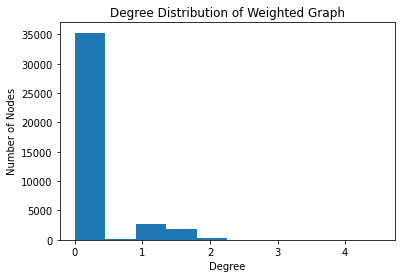

In [33]:
plt.hist(df['Weighted Degree'])
plt.title('Degree Distribution of Weighted Graph')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

A scale-free network is one that has a degree distribution that, at least asymptotically, follows a power law and decreases exponentially as the degree increases. The above bar graph shows that the mobility network does follow this as the number of nodes with a low degree is very high and then drops off very quickly.